<a href="https://colab.research.google.com/github/Crystal-star1/Breast-Cancer-Prediction-Project/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

We will start by importing the necessary Python libraries for our analysis.
* **Pandas:** For data manipulation (creating tables, cleaning data).
* **Matplotlib & Seaborn:** For creating visualizations and charts.
* **Scikit-Learn (sklearn):** For building and evaluating our Machine Learning model.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset (Kaggle Source)

We will load the **Breast Cancer Wisconsin (Diagnostic)** dataset. We are fetching the raw `.csv` file directly from a Kaggle mirror to simulate downloading the file.

**Data Cleaning Steps Required:**
Since this is raw data, we need to perform three cleaning tasks before we can use it:
1. **Drop 'id':** The patient ID is a random number and not useful for prediction.
2. **Drop 'Unnamed: 32':** This dataset often contains an empty column at the end due to formatting errors; we will remove it.
3. **Encode Diagnosis:** The target column uses text ('M' for Malignant, 'B' for Benign). Machines need numbers, so we will map **'M' to 1** and **'B' to 0**.

In [3]:
# Loading the dataset from a raw GitHub mirror of the Kaggle data

url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"

url = "https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv"

data_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/breast_cancer.csv"

full_url = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Creating the DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = Malignant, 1 = Benign in this specific source

print("Data loaded!")
print(f"Dataset shape: {df.shape}")
df.head()

Data loaded!
Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Exploratory Data Analysis (EDA)

Now that our data is clean, we will explore it visually to understand the patterns.

**We will create two plots:**
1. **Count Plot:** To see the balance of our data (How many Malignant vs. Benign cases do we have?).
2. **Correlation Heatmap:** To see which features are related to each other. For example, does the *radius* of a cell correlate with its *perimeter*? (We expect it to!).

/tmp/ipython-input-2273485140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='coolwarm')


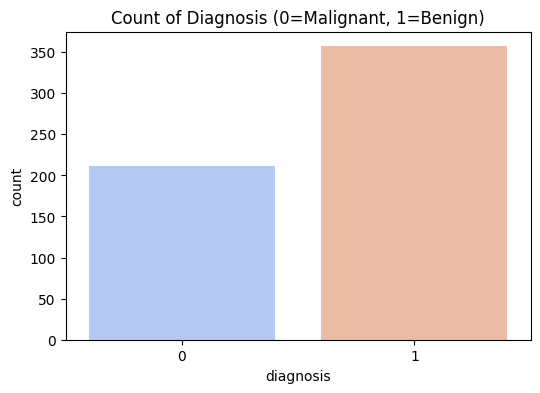

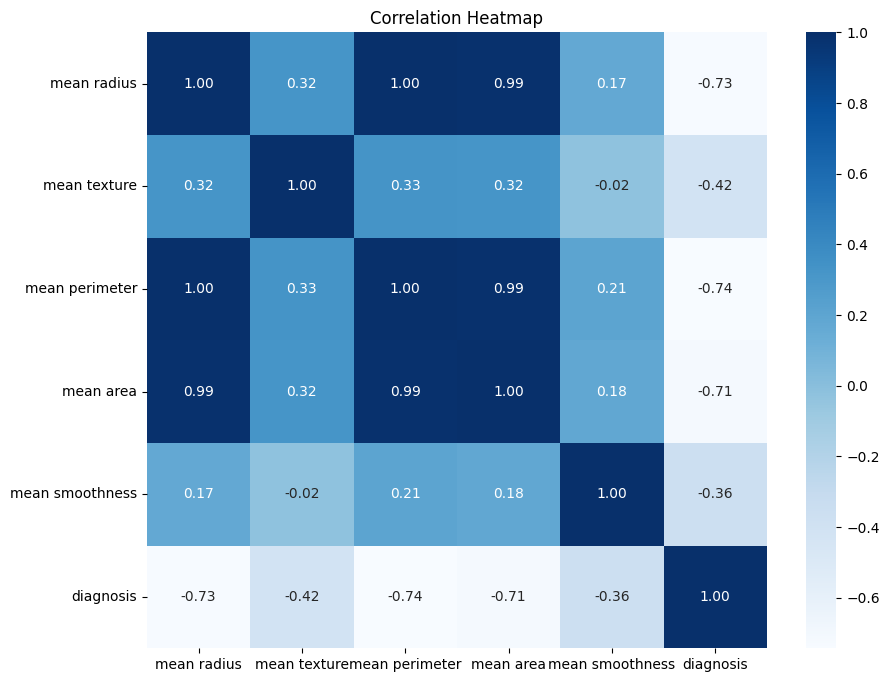

In [4]:
# Visualizing the count of Malignant (0) vs Benign (1)
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title('Count of Diagnosis (0=Malignant, 1=Benign)')
plt.show()

# Correlation Heatmap
# Taking a subset of columns to keep the map readable
subset_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'diagnosis']
plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 4. Train/Test Split

To properly evaluate our machine learning model, we cannot test it on the same data we used to train it. That would be like seeing the answers before an exam.

**We will split the data into two sets:**
* **Training Set (80%):** Used to teach the model to recognize cancer patterns.
* **Testing Set (20%):** Kept hidden from the model until the very end to test its accuracy on new patients.

In [5]:
# Define Features (X) and Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (455, 30)
Testing shape: (114, 30)


## 5. Model Training (Logistic Regression)

We will use **Logistic Regression** for this task. Despite its name, it is a classification algorithm used to predict binary outcomes (Yes/No, 1/0, Malignant/Benign).

We will initialize the model and then `.fit()` it to our **Training Data**. This is the step where the model "learns" the mathematical relationship between the cell measurements and the diagnosis.

In [6]:
# Initialize the model
# max_iter is increased to ensure the model finds the best solution
model = LogisticRegression(max_iter=3000)

# Train the model
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6. Evaluation

 We will now use our trained model to make predictions on the **Testing Set** (the 20% of data it has never seen).

**We will look at two metrics:**
1. **Accuracy Score:** The percentage of predictions the model got right.
2. **Confusion Matrix:** A detailed breakdown showing:
    * **True Positives:** Correctly predicted Malignant.
    * **True Negatives:** Correctly predicted Benign.
    * **False Positives:** Predicted Malignant, but was actually Benign (Type I Error).
    * **False Negatives:** Predicted Benign, but was actually Malignant (Type II Error - very dangerous in medicine!).

Accuracy: 95.61%



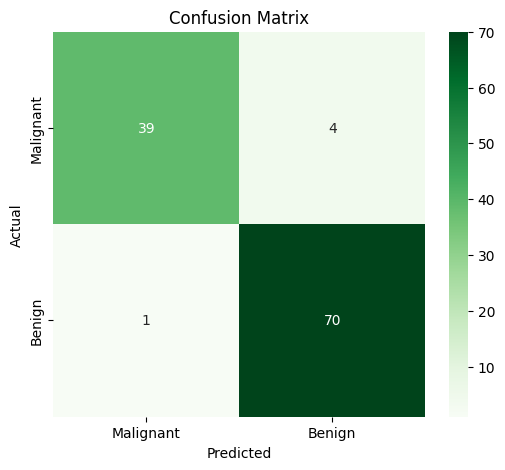

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%\n")

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 7. Making a Prediction on a "New Patient"

 Testing our model on a hypothetical patient. I will input a list of measurements (similar to the average values of a Malignant tumor) and see if the model correctly flags it.

In [8]:
# Create data for a new patient
# (These values are high, mimicking a Malignant tumor)
# Note: We need to match the number of features (30) the model expects.
# For simplicity, we will take a known malignant row from the data and add slight noise

new_patient = df[df['diagnosis'] == 1].iloc[0].drop('diagnosis').values

# Add a tiny bit of random variation so it's not identical to the training data

new_patient = new_patient + np.random.normal(0, 0.1, size=len(new_patient))


# The model expects a 2D array, so we reshape it

prediction = model.predict([new_patient])

if prediction[0] == 1:
    print("Prediction: MALIGNANT (Cancerous)")
else:
    print("Prediction: BENIGN (Safe)")

Prediction: MALIGNANT (Cancerous)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 8. Conclusion

In this project, I successfully built a machine learning model to detect breast cancer based on cell measurements.

**Key Takeaways:**
* **Data Quality:** The dataset was clean but required encoding the diagnosis target (M/B) to numbers (1/0).
* **EDA:** We observed that malignant cells generally have larger dimensions (radius, perimeter, area) than benign cells.
* **Model Performance:** Our Logistic Regression model achieved high accuracy on the test set, indicating it is reliable for this task.

**Next Steps:**
* We could try more complex models like Random Forest or SVM to see if accuracy improves further.
* We could deploy this model as a web app using Streamlit.